In [1]:
import sys
%reload_ext autoreload
%autoreload 2
sys.path.append('..')

from utils.visualization_tools import *
import utils.visualization_tools
from utils.data_transformations import *
import utils.data_transformations
from utils.diverse import *
import utils.diverse

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import logging
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)
logger.debug("test")


#from utils import drawing, fields

In [14]:
tensor = np.load("../datasets/contrast_to_pixelwise_mean/runstart16_X1.npy")

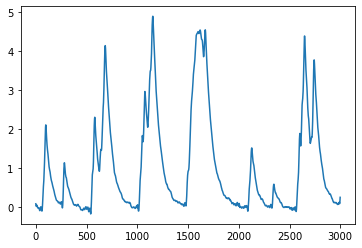

In [4]:
plt.plot(np.nanmean(tensor,axis=(1,2)))

In [11]:
roi = tensor.copy()
roi[np.isnan(roi)] = 0

In [12]:
vfields = horn_schunck(roi)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [14]:
#np.save("vfields.npy", np.array(vfields))

In [7]:
vfields = np.load("vfields.npy")

In [6]:
#from pynhhd import nHHD

In [5]:
mask = np.isnan(tensor[0])

In [6]:
tensor = None

In [10]:
vfields = vfields[:,:1000,:,:]

In [11]:
solenoidal, curl_free, curl_free_function = helmholtz_decomposition(vfields, mask)

....................................................................................................

No handles with labels found to put in legend.


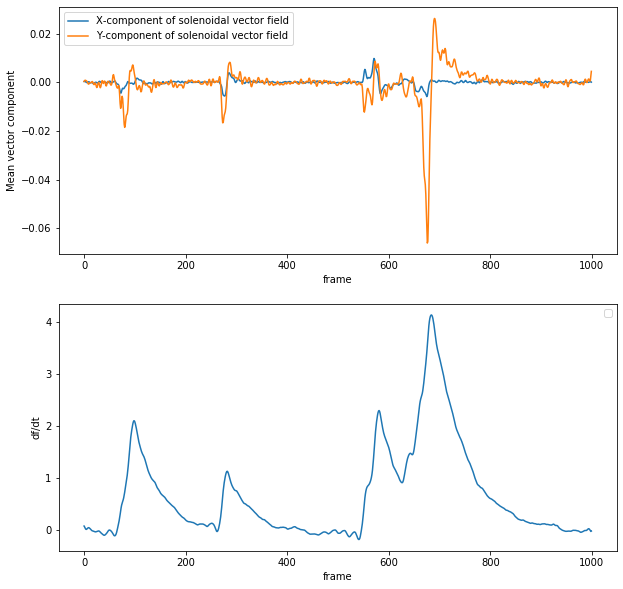

In [21]:
mean_solenoidal = [np.nanmean(solenoidal[0], axis=(1,2)),np.nanmean(solenoidal[1], axis=(1,2))]

fig, ax = plt.subplots(2, figsize=(10,10))
ax[1].plot(np.nanmean(tensor[:1000],axis=(1,2)))
ax[1].set_xlabel("frame")
ax[0].set_xlabel("frame")
ax[0].set_ylabel("Mean vector component")
ax[0].plot(mean_solenoidal[0], label="X-component of solenoidal vector field")
ax[0].plot(-mean_solenoidal[1], label= "Y-component of solenoidal vector field")
ax[0].legend()
ax[1].set_ylabel("df/dt")
ax[1].legend()
